# <b> Part 4. 금융시장 데이터 수집부터 예측까지 적용해보기</b>

### 자본시장 시계열 데이터의 EDA (pandas 라이브러리로 시계열 다루기)

In [3]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import os
import warnings        
warnings.filterwarnings("ignore") 
%matplotlib inline

In [4]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename,  index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [5]:
data.head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82


In [6]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.16,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.17,1252.25,22.31,118.65


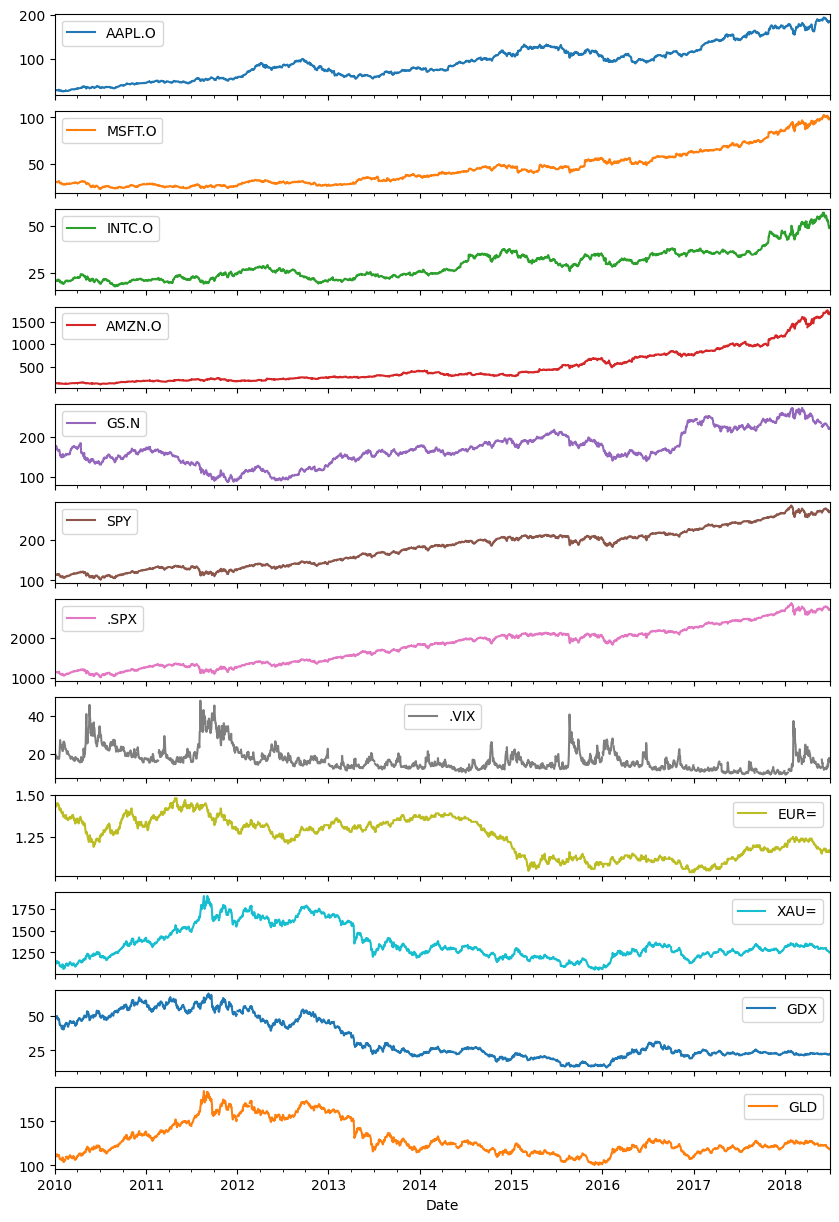

In [7]:
data.plot(figsize=(10, 15), subplots=True);

In [8]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [9]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [10]:
# Summary Stats
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [11]:
# 주식 거래 달에 21일 정도
# 12*21 = 252일이 1년 
# 252*8.5년 = 2132 -> row수와 비슷하다. 

In [12]:
data.describe().round(2) 

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.30,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.56,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [13]:
data.mean()

AAPL.O      93.456076
MSFT.O      44.561155
INTC.O      29.364210
AMZN.O     480.461258
GS.N       170.216221
SPY        180.323045
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248696
XAU=      1349.014129
GDX         33.566515
GLD        130.086595
dtype: float64

In [14]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.56,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [15]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82


In [16]:
## Changes over time

data.diff().head()  
# 차분을 해도 값이 큰 것을 알 수 있다.

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,23.65,NaN,NaN
2010-01-05,0.06,0.01,-0.01,0.79,3.06,0.30,3.53,-0.69,0.00,-1.35,0.46,-0.10
2010-01-06,-0.49,-0.19,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.00,19.85,1.17,1.81
2010-01-07,-0.06,-0.32,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.01,-6.60,-0.24,-0.69


In [17]:
data.diff().mean() 

AAPL.O    0.064745
MSFT.O    0.031252
INTC.O    0.013552
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072101
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000117
XAU=      0.041887
GDX      -0.015070
GLD      -0.003455
dtype: float64

In [18]:
# Transform of price series to log return series
# Using padas to make return series
data.pct_change().round(3).head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,0.000,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.000,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


<Axes: >

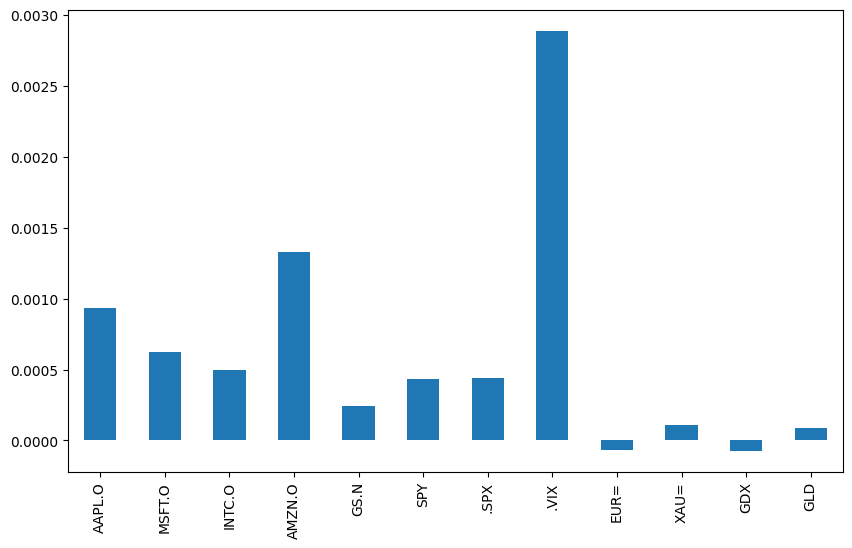

In [19]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

## <b> Ch 3. 금융시계열 이용하여 시장 예측하기 </b>

### 포트폴리오 최적화

In [20]:
# 로그 수익률 시계열 만들기

In [21]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename,  index_col=0, parse_dates=True)

In [22]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [23]:
# 차분
data.shift(1)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-05,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-06,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-07,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,184.92,100.41,52.50,1715.67,226.02,274.74,2754.88,13.77,1.17,1268.49,22.18,120.34
2018-06-26,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-27,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26


In [24]:
data.shift(periods=-1)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-04,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-05,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-06,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-07,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-26,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58
2018-06-27,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.16,1247.88,21.93,118.22


In [25]:
rets = np.log(data / data.shift(1)) # 수익률 시계열 가장 간단하게 만드는 방법

In [26]:
symbols = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS', 'SPY', 'SPX', 'VIX', 'EUR', 'XAU', 'GDX', 'GLD']
data_asset = data.copy()
data_asset.columns = symbols

In [27]:
rets_asset = np.log(data_asset / data_asset.shift(1)) # 자산이름 추가

In [28]:
rets_asset_summary = rets_asset[['AAPL', 'GS', 'SPY', 'VIX', 'GLD']] # 일부 종목 추출

<Axes: xlabel='Date'>

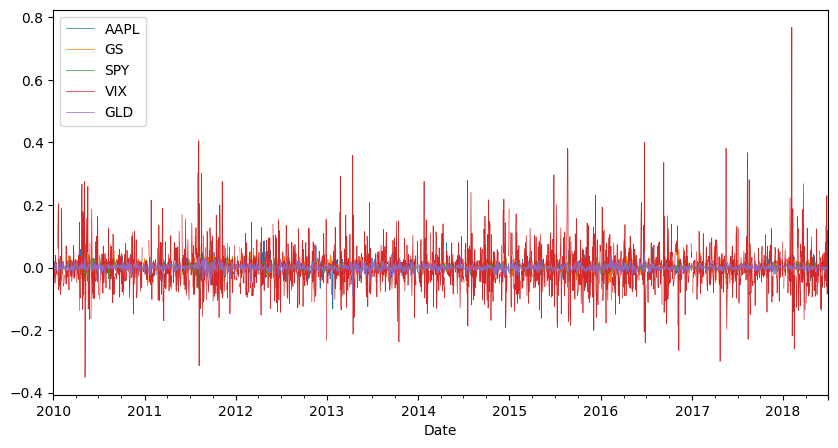

In [29]:
# Daily Return Visualized
rets_asset_summary .plot(figsize=(10, 5), lw=0.5)

In [33]:
# 일간 수익률을 연율화
rets.mean( )* 252 # 앞서서 트레이딩 데이는 1년에 252일 이었다. 
# 과거의 데이터를 바탕으로 예측해보면
# 가만히 두면 아래와 같이 종목들이 아래와 같은 수익을 가진다. 

AAPL.O    0.181369
MSFT.O    0.124881
INTC.O    0.096782
AMZN.O    0.287548
GS.N      0.028561
SPY       0.097282
.SPX      0.098986
.VIX     -0.293504
EUR=     -0.022830
XAU=      0.009427
GDX      -0.104020
GLD      -0.003784
dtype: float64

In [34]:
ret = rets.dropna()

In [36]:
# 공분산 행렬
# 공분산이란 다변량 일때 변수간의 분산을 나타냄.
rets.cov() * 252

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
AAPL.O,0.064026,0.023646,0.023639,0.027066,0.023499,0.021151,0.021235,-0.144459,0.002032,0.001226,0.014513,0.001424
MSFT.O,0.023646,0.051201,0.030287,0.030386,0.026774,0.022389,0.022518,-0.149149,0.002453,-0.000382,0.010894,-0.000372
INTC.O,0.023639,0.030287,0.056405,0.025005,0.027758,0.022801,0.022903,-0.151103,0.003371,0.000144,0.012782,0.000170
AMZN.O,0.027066,0.030386,0.025005,0.095836,0.026640,0.024298,0.024449,-0.171029,0.003552,-0.001377,0.010232,-0.001364
GS.N,0.023499,0.026774,0.027758,0.026640,0.069593,0.028021,0.028125,-0.185918,0.004005,-0.002703,0.008299,-0.002603
SPY,0.021151,0.022389,0.022801,0.024298,0.028021,0.022050,0.022018,-0.146152,0.003563,0.000047,0.011889,0.000107
.SPX,0.021235,0.022518,0.022903,0.024449,0.028125,0.022018,0.022158,-0.147143,0.003596,0.000139,0.012039,0.000193
.VIX,-0.144459,-0.149149,-0.151103,-0.171029,-0.185918,-0.146152,-0.147143,1.502097,-0.018502,-0.000343,-0.077766,-0.000078
EUR=,0.002032,0.002453,0.003371,0.003552,0.004005,0.003563,0.003596,-0.018502,0.011256,0.004500,0.011675,0.004672
XAU=,0.001226,-0.000382,0.000144,-0.001377,-0.002703,0.000047,0.000139,-0.000343,0.004500,0.024912,0.044644,0.025450


In [37]:
# import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
# import matplotlib.pyplot as plt
# %matplotlib inline

In [38]:
# pdf 생성 위한 인수
r = 0.05
M = 2061
sigma = 0.2

In [39]:
log_return = np.array(ret['SPY'])

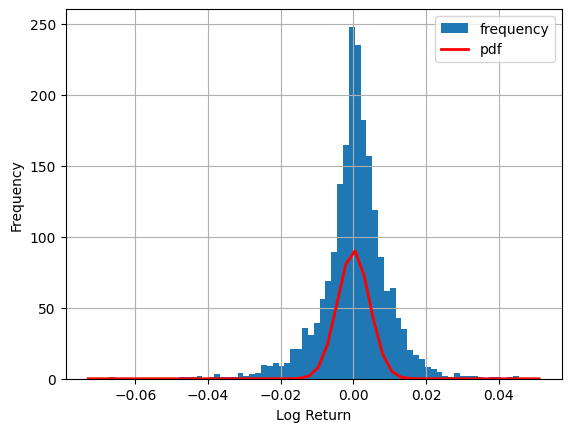

In [40]:
plt.hist(log_return.flatten(), bins=70, label='frequency')
plt.grid(True)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)), 'r', lw=2, label='pdf')
plt.legend()

In [41]:
# SciPy에서 수익률 데이터의 통계량 구하기
# scs.describe(log_return)

In [42]:
def print_statistics(array):
  sta = scs.describe(array)
  print('Statistic (통계량) |', 'Value (값)')
  print('--------------------')
  print('size |', sta[0])
  print('min |', sta[1][0])
  print('max |', sta[1][1])
  print('mean |', sta[2])
  print('std |', np.sqrt(sta[3]))
  print('skew|', sta[4])
  print('kurtosis |', sta[5])

In [43]:
print_statistics(log_return)

Statistic (통계량) | Value (값)
--------------------
size | 2061
min | -0.06734057781115321
max | 0.045450496816366155
mean | 0.00038603872907587357
std | 0.009354127350938931
skew| -0.5386276197067666
kurtosis | 4.611347558478201


In [45]:
# print("Skewness: {:.7f}".format( scs.skew(log_return)) )
print("Skewness Test p-value: {:.7f}".format( scs.skewtest(log_return)[1]) ) # 샘플의 왜도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
# print("Kurtosis: {:.7f}".format( scs.kurtosis(log_return)) )
print("Kurtosis Test p-value: {:.7f}".format( scs.kurtosistest(log_return)[1]) ) # 샘플의 첨도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
print("Normality Test p-value: {:.7f}".format( scs.normaltest(log_return)[1]) ) # 영가설: 샘플의 분포가 정규분포이다. (유의확률이 클수록 정규분포 가설을 강하게 지지)

# p-value가 작아서 가설을 기각할 수 있다. = 정규분포와 일치하지 않는다.

Skewness Test p-value: 0.0000000
Kurtosis Test p-value: 0.0000000
Normality Test p-value: 0.0000000


Text(0.5, 1.0, 'Log Return Series Q-Q Plot')

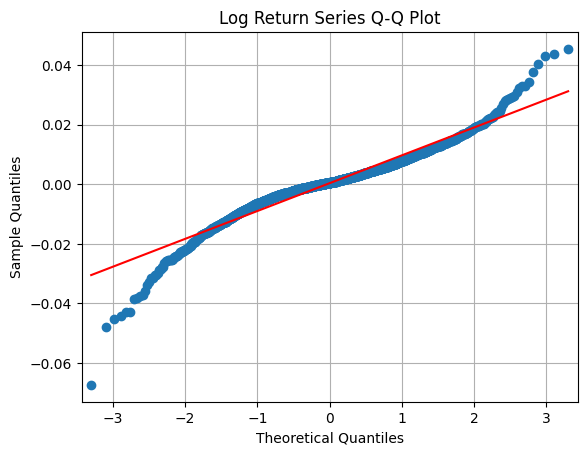

In [48]:
sm.qqplot(log_return.flatten(), line='s')
plt.grid(True)
plt.xlabel("Theoretical Quantiles") #  (정규분포 상의 이론적 분위수)
plt.ylabel("Sample Quantiles") # (샘플 분위수)
plt.title("Log Return Series Q-Q Plot") # 강한 fat-tail이다. 상대 평가할때 분위수가 일정해야하는 끝부분들이 올라가고 내려가 있다.

In [49]:
rets.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

array([[<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'SPY'}>],
       [<Axes: title={'center': '.VIX'}>,
        <Axes: title={'center': 'GLD'}>]], dtype=object)

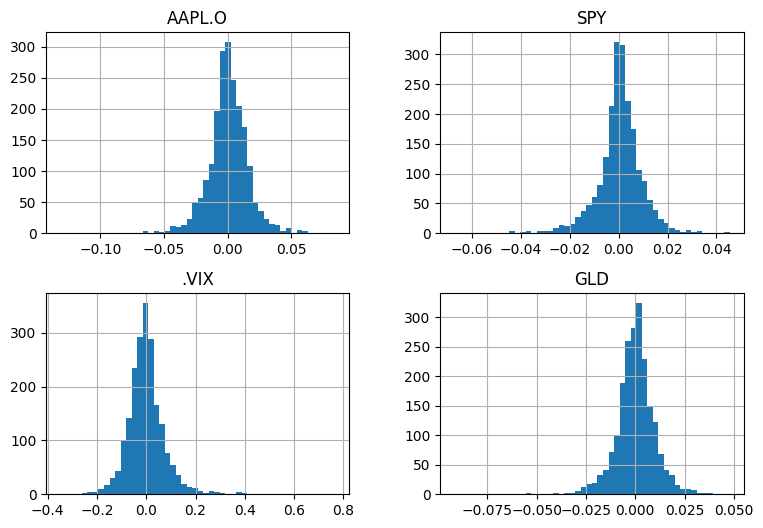

In [50]:
log_returns = rets[['AAPL.O','SPY','.VIX', 'GLD']]
log_returns.hist(bins=50, figsize=(9, 6))

In [51]:
# 포트폴리오 이론 기초

In [52]:
rets_asset_summary.columns

Index(['AAPL', 'GS', 'SPY', 'VIX', 'GLD'], dtype='object')

In [53]:
np.random.seed(813)
noa = len(rets_asset_summary.columns)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.36667945, 0.3232487 , 0.09668174, 0.00235596, 0.21103415])

In [56]:
np.sum(rets_asset_summary.mean()*weights) * 252
# 아무것도 하지않아도 자산의 연 수익률
# 꾀 높게 나왔기 때문에 자산배분을 잘했다고 볼 수 있다. 자산의 배분만으로도 수익을 크게 낼 수 있다.

0.08365183918390344

In [64]:
# return(최대화)과 variance(최소화 해야함, 그러나 일정수준 유지를 해야할 수도 있음)를 최적화
# -> 평균-분산 최적화(MVO) : 일정수준의 변동성내에서, 리턴 최대화 
# 변동성이 크면 리턴도 클 수도 있음, 변동성이 안정적이면 리턴도 일정함.


In [61]:
prets = [] # portfolio return
pvols = [] # poortfolio volatility
for p in range(2500):
  weights = np.random.random(noa)
  weights /= np.sum(weights)
  prets.append(np.sum(rets_asset_summary.mean() * weights) * 252)
  pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

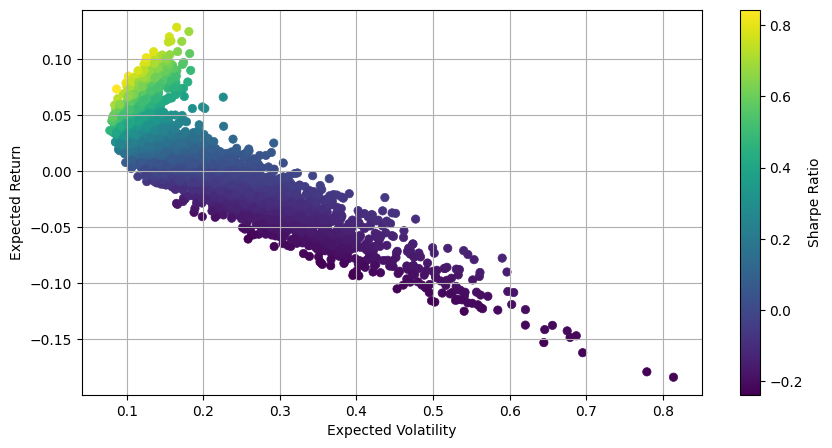

In [72]:
plt.figure(figsize=(10, 5))
plt.scatter(pvols, prets, c=prets/pvols, marker='o', lw=0.5)
plt.grid(True)
plt.xlabel('Expected Volatility') # 변동성
plt.ylabel('Expected Return') #수익
plt.colorbar(label='Sharpe Ratio') # objective, maximum draw down(MDD) #리스크 대비 리턴이다. 이것을 최대화 하는 것이 목표.

# 밑의 그림 결과 리스크(변동성)가 증가할수록 리턴이 무한히 크지 않다는것을 알 수 있었음.
# 리턴이 non-linear하게 증가한것이 보인다.
# 경험적으로 그림을 통해 결과를 볼 수 있음.

In [73]:
# Portfolio Optimization
# Sharpe Ratio를 최소화 함.

In [66]:
def statistics(weights):
  weights = np.array(weights)
  pret = np.sum(rets_asset_summary.mean() * weights) * 252
  pvol = np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov() * 252, weights)))
  return np.array([pret, pvol, pret/pvol])

In [67]:
def min_sharpe(weights):
  return statistics(weights)[2]  * (-1)

In [74]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for x in range(noa))

In [77]:
import scipy
optimize = scipy.optimize.minimize(min_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bounds, constraints=constraints)
optimize

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9216716127758776
       x: [ 2.155e-01  5.563e-16  7.145e-01  6.998e-02  0.000e+00]
     nit: 9
     jac: [ 1.291e-04  9.204e-01  2.072e-04 -2.512e-03  7.777e-02]
    nfev: 59
    njev: 9

In [79]:
optimize.x.round(3) # 각 컬럼의 최적화 된 배분 값

array([0.215, 0.   , 0.715, 0.07 , 0.   ])

In [82]:
rets_asset_summary.columns

Index(['AAPL', 'GS', 'SPY', 'VIX', 'GLD'], dtype='object')

In [80]:
statistics(optimize.x.round(3)) # [pret, pvol, pret/pvol]

array([0.0880055, 0.0954847, 0.9216712])

### 자산가격 시계열의 기술적 분석과 매매전략

In [83]:
# 기술적 분석

In [85]:
rets # 10가지 자사군에 대한 자산 수익률 데이터 

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006969,0.021342,NaN,NaN
2010-01-05,0.001961,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,0.000000,-0.001206,0.009595,-0.000911
2010-01-06,-0.016127,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.000000,0.017589,0.023999,0.016365
2010-01-07,-0.001993,-0.010454,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006969,-0.005814,-0.004876,-0.006207
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-0.013706,-0.013820,0.229947,0.000000,-0.002755,-0.007694,-0.003746
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181,0.002212,0.002202,-0.084863,-0.008584,-0.005040,-0.002730,-0.005269
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-0.008319,-0.008642,0.117783,0.000000,-0.005593,-0.006399,-0.005718


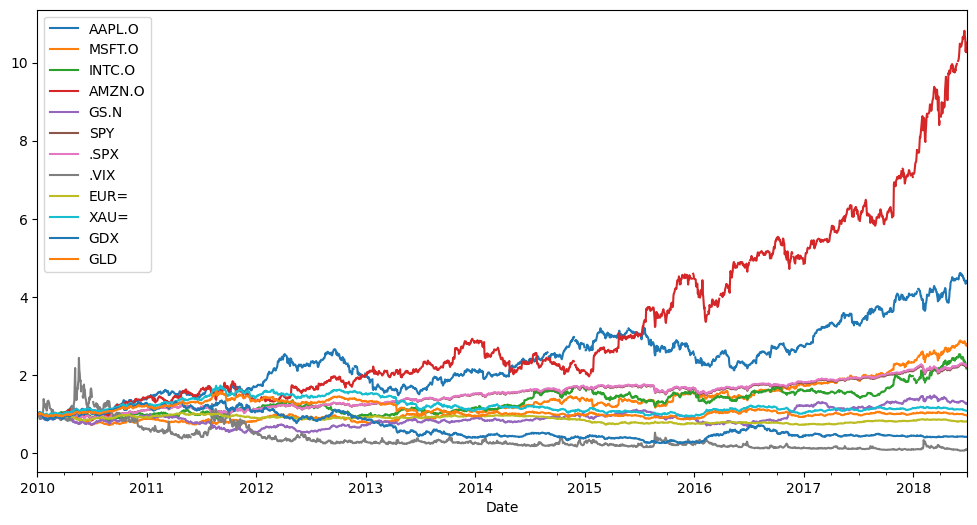

In [86]:
# price series가 log화된 return series를 exponation하며 다시 price series로 바꿈.
# unit이 다름. price series는 1부터 시작, return series는 0부터 시작(수익률 이기 때문)
rets.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

In [91]:
# 시계열의 Sampling, 구간별로 끝값을 뽑아냄.
# 독립이 아닌 시계열 데이터라 랜덤하게 뽑지 않음.
data.resample('1w', label='right').last().head() 

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-10,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
2010-01-17,29.42,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.44,1129.90,47.42,110.86
2010-01-24,28.25,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.41,1092.60,43.79,107.17
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96


<Axes: xlabel='Date'>

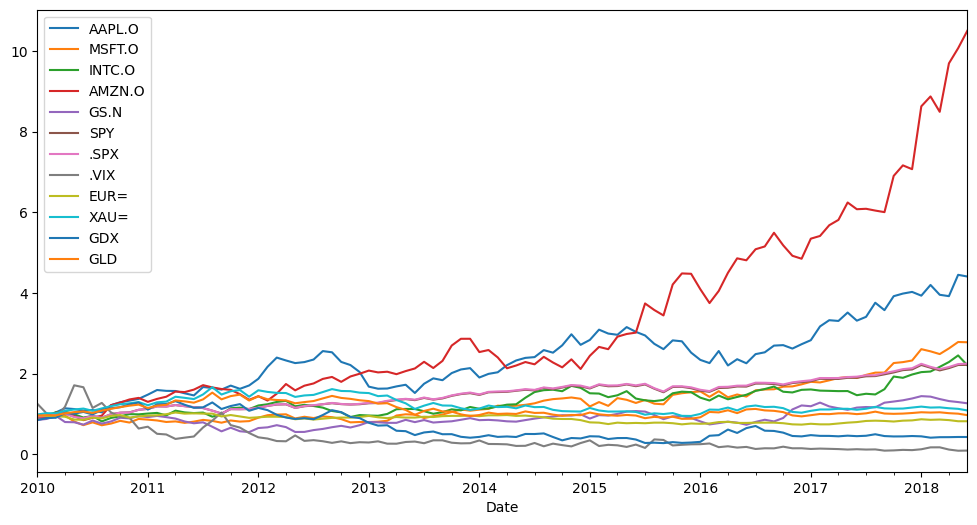

In [92]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(12, 6)) # 월간 수익률data.resample('1m', label='right').last().head()  

In [95]:
## 시계열의 Rolling Statistics 구하기
# resampling의 종류

sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [96]:
import math
window = 20
data[sym].rolling(window=window).std() * math.sqrt(window)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2018-06-25    14.590562
2018-06-26    15.312285
2018-06-27    16.012419
2018-06-28    16.248997
2018-06-29    16.575959
Name: AAPL.O, Length: 2138, dtype: float64

In [97]:
## 특정 기간 동안의 Rolling 지표 구하기 
window = 20  

data['min'] = data[sym].rolling(window=window).min()  
data['mean'] = data[sym].rolling(window=window).mean()  
data['std'] = data[sym].rolling(window=window).std()  
data['median'] = data[sym].rolling(window=window).median()  
data['max'] = data[sym].rolling(window=window).max()  
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean() # Exponentially Weighted Moving Average

data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.82,27.44,29.5810,0.933313,29.820,30.72,27.807013
2010-02-02,27.98,27.44,29.4515,0.967908,29.710,30.72,27.936753
2010-02-03,28.46,27.44,29.3430,0.950314,29.685,30.72,28.329188
2010-02-04,27.44,27.44,29.2080,1.020333,29.545,30.72,27.662297
2010-02-05,27.92,27.44,29.1000,1.037350,29.420,30.72,27.855574


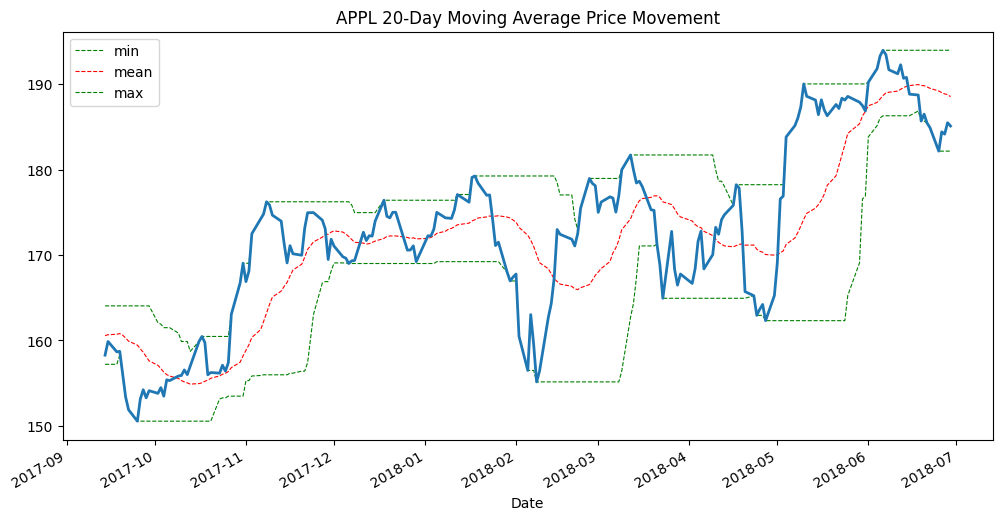

In [100]:
# Price Movement의 시각화
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)
plt.title("APPL 20-Day Moving Average Price Movement") # 구간화
plt.show()

# original데이터 보다는 스무딩되어 있으면서도 약간의 래그가 발생한것 처럼 보임.

In [99]:
###  자본시장 시계열의 기술적 분석
data['SMA1'] = data[sym].rolling(window=42).mean()  # short-term
data['SMA2'] = data[sym].rolling(window=252).mean()  # long-term
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


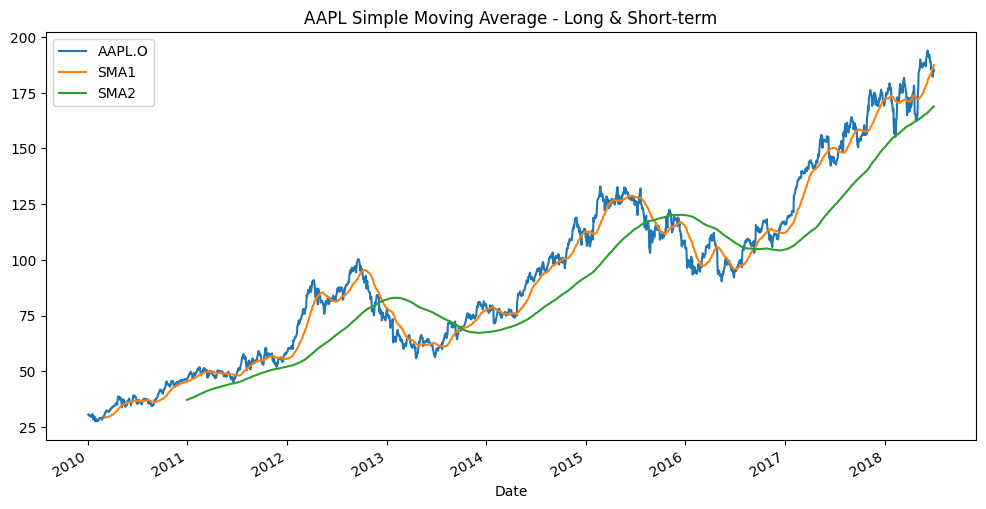

In [101]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AAPL Simple Moving Average - Long & Short-term")
plt.show()

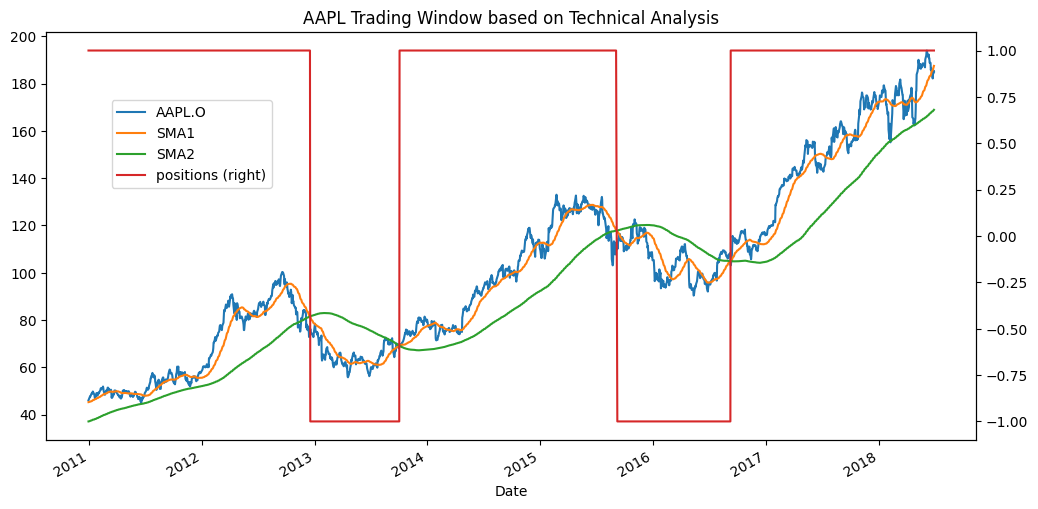

In [103]:
### 가격 추이에 따른 포지션(Trading Strategy)
# 예시: 골든 크로스(Golden Cross), 데드 크로스(Dead Cross)

data.dropna(inplace=True)  

data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(12, 6), secondary_y='positions') 
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

plt.title("AAPL Trading Window based on Technical Analysis")
plt.show()

### Auto ARIMA로 자산가격 예측하기

In [104]:
## Auto Arima(p, d, q) 실습

In [106]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import os
import warnings        
warnings.filterwarnings("ignore") 
%matplotlib inline

In [108]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00


In [109]:
import pmdarima as pm
from pmdarima.arima import ndiffs

In [110]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [111]:
# 차분이 필요한지, 필요하다면 몇 차 차분이 최선인지 파악

In [112]:
data_y = data.dropna()

In [113]:
data_y

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-08,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [114]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [115]:
y = data_y[['AAPL.O']].iloc[-200:]
y

,AAPL.O
Date,
2017-09-14,158.28
2017-09-15,159.88
2017-09-18,158.67
2017-09-19,158.73
2017-09-20,156.07
...,...
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16


In [116]:
ndiffs(y) # 차수

1

In [117]:
y_train = y['AAPL.O'][:int(0.7*len(y))]
y_test = y['AAPL.O'][int(0.7*len(y)):] 

<Axes: xlabel='Date'>

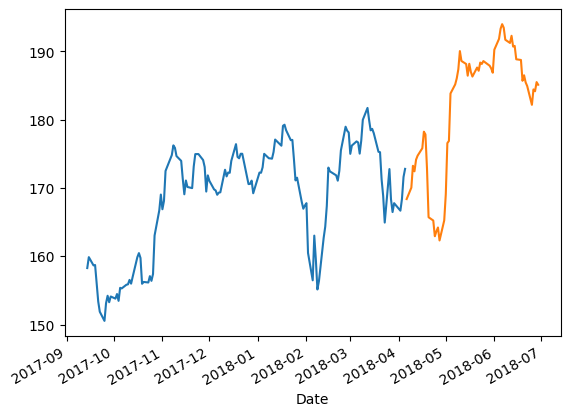

In [118]:
y_train.plot()
y_test.plot()

In [121]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"d = {n_diffs}")

# 차수(차분)가 1만 되어도 통계적인 검정테스트 통과함.

d = 1


In [125]:
model = pm.auto_arima(y = y_train       # 데이터
                      , d = 1           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )
# p와 q를 정해야함.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.258 seconds


In [128]:
model = pm.auto_arima (y_train, d = 1, seasonal = False, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.794 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [129]:
# 잔차 검정
# 잔차가 백색잡음 과정인지 (=정상성을 만족하는지), 정규성 및 등분산성을 만족하는지 파악합

# 1. summary 결과에서 Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB) 검정 만족 여부를 파악
# 2. plot_diagnostics 잔차 그래프로 정상성과 정규성을 만족하는지 파악

In [130]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -314.172
Date:                Thu, 25 May 2023   AIC                            630.345
Time:                        05:34:28   BIC                            633.279
Sample:                             0   HQIC                           631.537
                                - 140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.3795      0.509     10.576      0.000       4.383       6.376
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                 9.58
Prob(Q):                              0.34   Pr

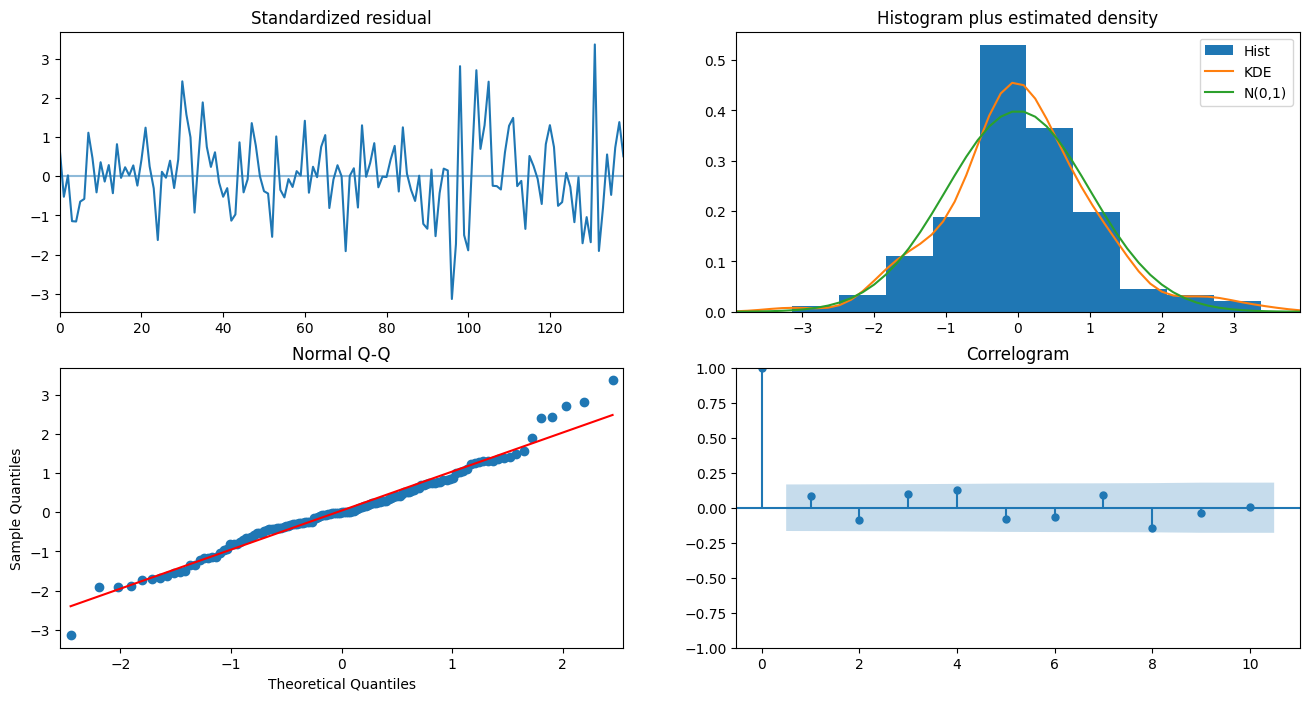

In [133]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()
# 비정상성을 없앤것을 알 수 있다. 모델에 피팅을 잘했다.

In [132]:
# 모형 예측

In [134]:
y_train.head(5)

Date
2017-09-14    158.28
2017-09-15    159.88
2017-09-18    158.67
2017-09-19    158.73
2017-09-20    156.07
Name: AAPL.O, dtype: float64

In [135]:
y_test

Date
2018-04-06    168.38
2018-04-09    170.05
2018-04-10    173.25
2018-04-11    172.44
2018-04-12    174.14
2018-04-13    174.73
2018-04-16    175.82
2018-04-17    178.24
2018-04-18    177.84
2018-04-19    172.80
2018-04-20    165.72
2018-04-23    165.24
2018-04-24    162.94
2018-04-25    163.65
2018-04-26    164.22
2018-04-27    162.32
2018-04-30    165.26
2018-05-01    169.10
2018-05-02    176.57
2018-05-03    176.89
2018-05-04    183.83
2018-05-07    185.16
2018-05-08    186.05
2018-05-09    187.36
2018-05-10    190.04
2018-05-11    188.59
2018-05-14    188.15
2018-05-15    186.44
2018-05-16    188.18
2018-05-17    186.99
2018-05-18    186.31
2018-05-21    187.63
2018-05-22    187.16
2018-05-23    188.36
2018-05-24    188.15
2018-05-25    188.58
2018-05-29    187.90
2018-05-30    187.50
2018-05-31    186.87
2018-06-01    190.24
2018-06-04    191.83
2018-06-05    193.31
2018-06-06    193.98
2018-06-07    193.46
2018-06-08    191.70
2018-06-11    191.23
2018-06-12    192.28
2018-06-

In [136]:
y_pred = model.predict(n_periods=len(y_test)) # Test 기간 = 60일 

In [137]:
y_pred

140    172.8
141    172.8
142    172.8
143    172.8
144    172.8
145    172.8
146    172.8
147    172.8
148    172.8
149    172.8
150    172.8
151    172.8
152    172.8
153    172.8
154    172.8
155    172.8
156    172.8
157    172.8
158    172.8
159    172.8
160    172.8
161    172.8
162    172.8
163    172.8
164    172.8
165    172.8
166    172.8
167    172.8
168    172.8
169    172.8
170    172.8
171    172.8
172    172.8
173    172.8
174    172.8
175    172.8
176    172.8
177    172.8
178    172.8
179    172.8
180    172.8
181    172.8
182    172.8
183    172.8
184    172.8
185    172.8
186    172.8
187    172.8
188    172.8
189    172.8
190    172.8
191    172.8
192    172.8
193    172.8
194    172.8
195    172.8
196    172.8
197    172.8
198    172.8
199    172.8
dtype: float64

In [138]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

2018-04-06 00:00:00      NaN
2018-04-09 00:00:00      NaN
2018-04-10 00:00:00      NaN
2018-04-11 00:00:00      NaN
2018-04-12 00:00:00      NaN
                       ...  
195                    172.8
196                    172.8
197                    172.8
198                    172.8
199                    172.8
Name: pred, Length: 120, dtype: float64

In [144]:
# 모델 업데이트 설정

# 시계열 모델에서 입력을 좀더 다양하게 해야함. 롤링으로 입력을 준다. 최신값을 반영할 수 있도록 모델을 업데이트한다. 

In [140]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)               
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [141]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트
    model.update(new_ob)

In [142]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
Date,,
2018-04-06,168.38,172.80
2018-04-09,170.05,168.38
2018-04-10,173.25,170.05
2018-04-11,172.44,173.25
2018-04-12,174.14,172.44
2018-04-13,174.73,174.14
2018-04-16,175.82,174.73
2018-04-17,178.24,175.82
2018-04-18,177.84,178.24


In [143]:
# 결과의 해석

In [145]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -451.049
Date:                Thu, 25 May 2023   AIC                            904.098
Time:                        05:42:40   BIC                            907.391
Sample:                             0   HQIC                           905.431
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.4481      0.410     13.288      0.000       4.645       6.252
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):                20.51
Prob(Q):                              0.08   Pr

In [146]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

Date
2018-04-06    172.80
2018-04-09    168.38
2018-04-10    170.05
2018-04-11    173.25
2018-04-12    172.44
2018-04-13    174.14
2018-04-16    174.73
2018-04-17    175.82
2018-04-18    178.24
2018-04-19    177.84
2018-04-20    172.80
2018-04-23    165.72
2018-04-24    165.24
2018-04-25    162.94
2018-04-26    163.65
2018-04-27    164.22
2018-04-30    162.32
2018-05-01    165.26
2018-05-02    169.10
2018-05-03    176.57
2018-05-04    176.89
2018-05-07    183.83
2018-05-08    185.16
2018-05-09    186.05
2018-05-10    187.36
2018-05-11    190.04
2018-05-14    188.59
2018-05-15    188.15
2018-05-16    186.44
2018-05-17    188.18
2018-05-18    186.99
2018-05-21    186.31
2018-05-22    187.63
2018-05-23    187.16
2018-05-24    188.36
2018-05-25    188.15
2018-05-29    188.58
2018-05-30    187.90
2018-05-31    187.50
2018-06-01    186.87
2018-06-04    190.24
2018-06-05    191.83
2018-06-06    193.31
2018-06-07    193.98
2018-06-08    193.46
2018-06-11    191.70
2018-06-12    191.23
2018-06-

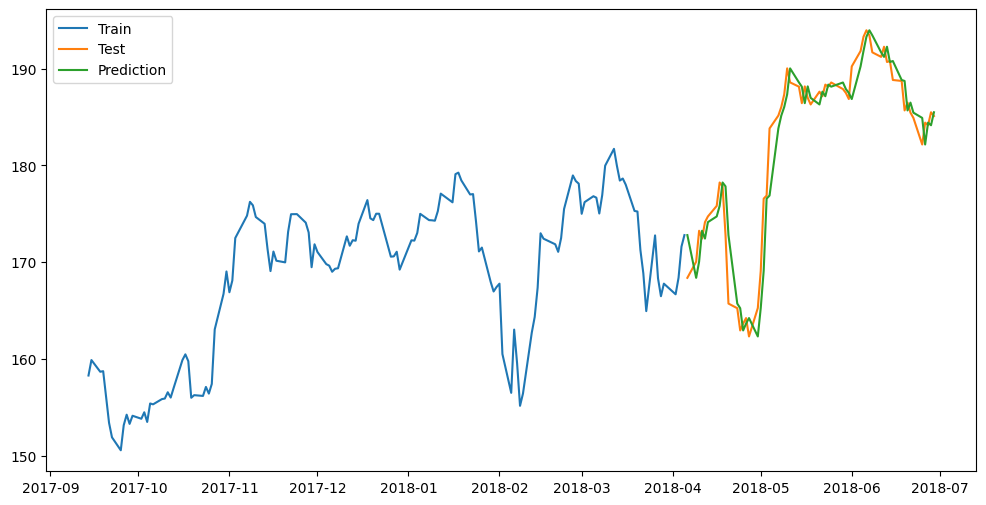

In [147]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(y_train, label='Train')        
plt.plot(y_test, label='Test')          
plt.plot(y_predict_df, label='Prediction')   
plt.legend()
plt.show()

In [148]:
# 시계열 모형의 평가 (mean absolute percentage error)

In [149]:
def MAPE(y_test, y_pred): 
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE (%): {MAPE(y_test, y_pred):.3f}")

MAPE (%): 0.949


## <b> Ch 4. 금융시계열과 추가 변수를 이용한 시장 예측해 보기 </b>

### 벡터자기회귀(Vector AutoRegressive Model, VAR)

- 실증분석에서는 2개 이상의 시계열을 동시에 모형화하는 것이 유리
- 자산시장를 비롯한 거시경제 시계열은 서로 독립적으로 움직이는 것이 아니라 일정한 상관관계를 보이는 편
- 벡터자기회귀(VAR)은 k개의 AR식을 벡터로 쌓은 것과 같다 
- 다만 단일 시계열 AR과 다른 점은 설명변수로 자기 자신의 lag뿐 아니라 다른 변수들의 lag도 포함한다는 점

In [152]:
#Python `statsmodels` Datasets Package
# https://www.statsmodels.org/0.6.1/datasets/index.html
#US Marcroecnomic Data
# https://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html

In [166]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

year      - 1959q1 - 2009q3

quarter   - 1-4

realgdp   - Real gross domestic

product (Bil. of chained 2005 US$,
            seasonally adjusted annual rate)

realcons  - Real personal consumption expenditures (Bil. of chained
            2005 US$, seasonally adjusted annual rate)

realinv   - Real gross private domestic investment (Bil. of chained
            2005 US$, seasonally adjusted annual rate)

realgovt  - Real federal consumption expenditures & gross investment
            (Bil. of chained 2005 US$, seasonally adjusted annual rate)

realdpi   - Real private disposable income (Bil. of chained 2005
            US$, seasonally adjusted annual rate)

cpi       - End of the quarter consumer price index for all urban
            consumers: all items (1982-84 = 100, seasonally adjusted).

m1        - End of the quarter M1 nominal money stock (Seasonally
            adjusted)

tbilrate  - Quarterly monthly average of the monthly 3-month
            treasury bill: secondary market rate

unemp     - Seasonally adjusted unemployment rate (%)

pop       - End of the quarter total population: all ages incl. armed
            forces over seas

infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)

realint(이자율)   - Real interest rate (tbilrate - infl)

In [167]:
# Load data : united states macroeconomic data (미국 거시경제 데이터)
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [171]:
df = mdata.copy()

In [172]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]

In [173]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)

<Axes: >

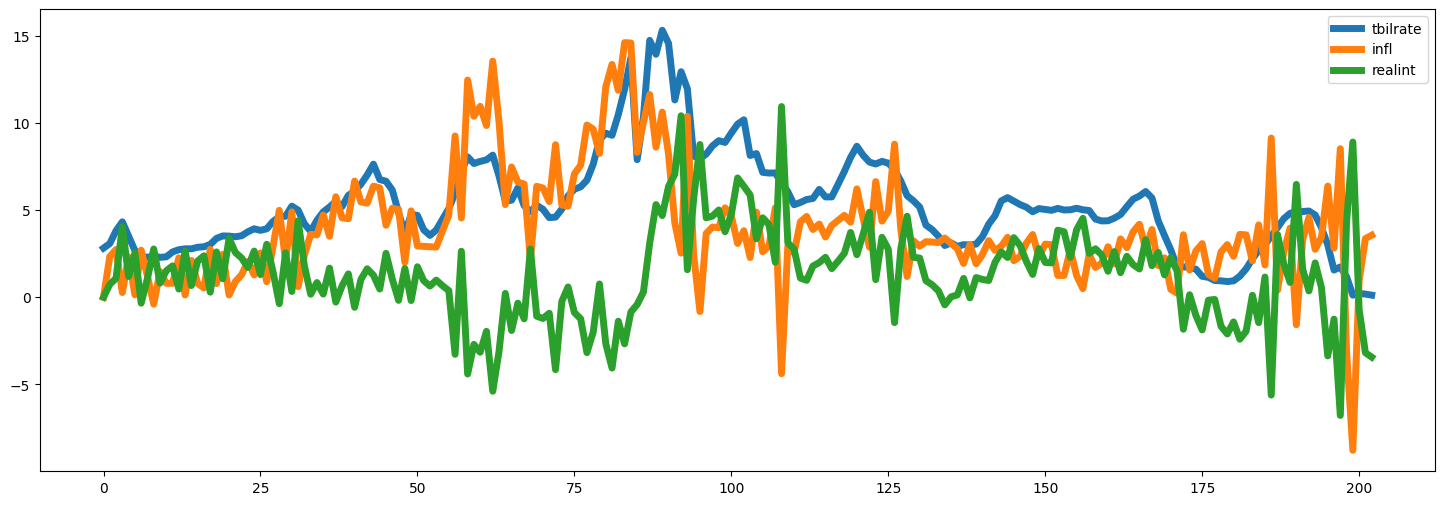

In [175]:
mdata[['tbilrate', 'infl',	'realint']].plot(figsize=(18, 6), linewidth=5)

# tbilrate: 미국 국채 수익률
# infl: 물가상승률
# realint: 이자율


In [159]:
mdata = mdata[['realgdp','realcons','realinv']] # select 3 series
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

<Axes: >

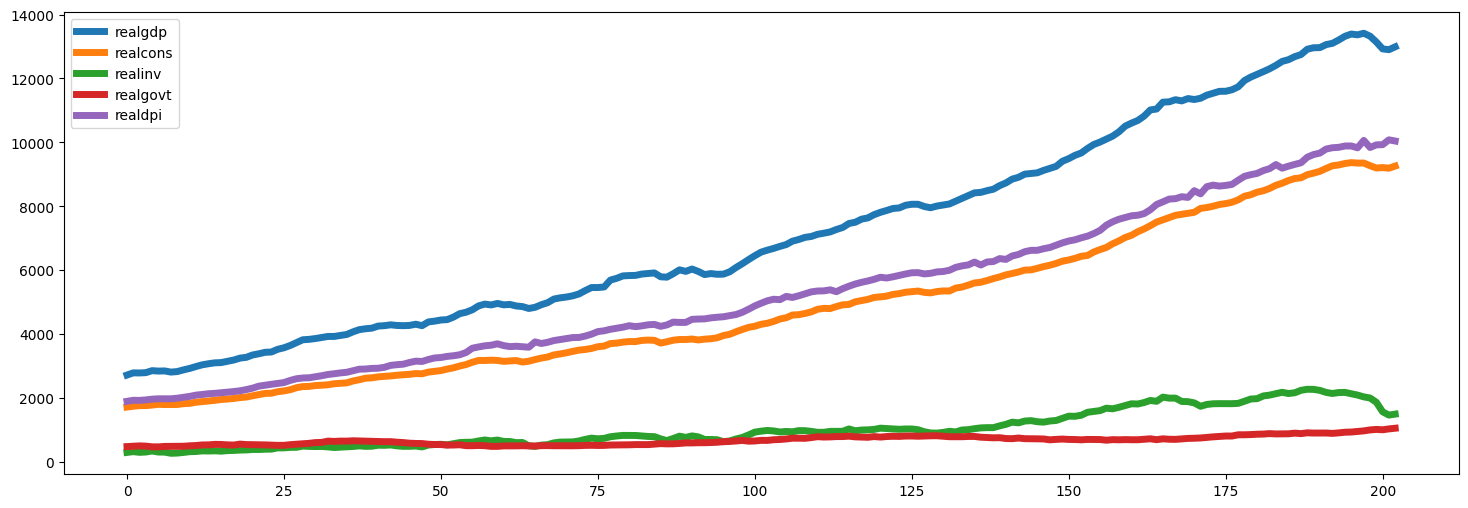

In [160]:
import matplotlib.pyplot as plt
df[['realgdp',	'realcons',	'realinv',	'realgovt',	'realdpi']].plot(figsize=(18, 6), linewidth=5)

In [161]:
# EDA

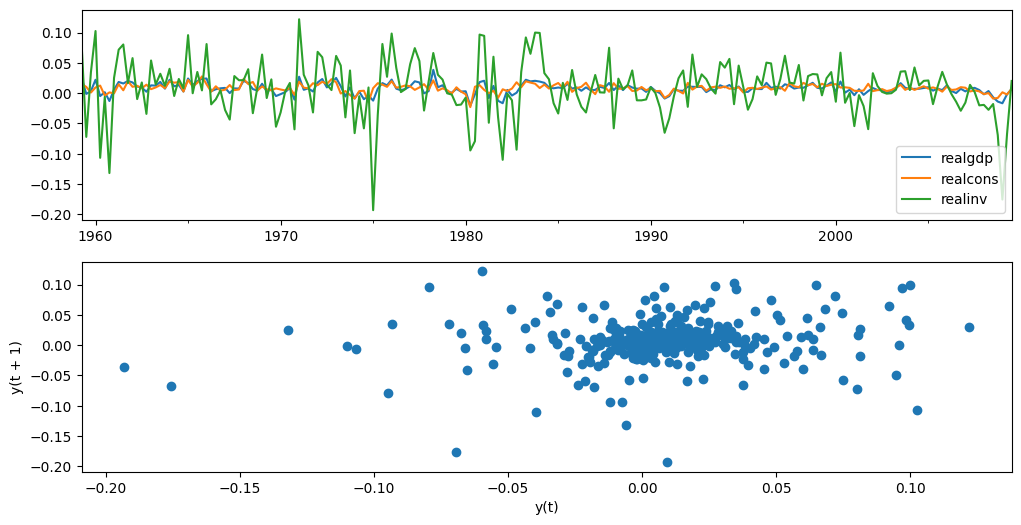

In [162]:
# Visualize serial correlations 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
data.plot(ax=ax1) # series plot
pd.plotting.lag_plot(data) # lag plot # Random series does not exhibit a structure in the lag plot.
plt.show() 

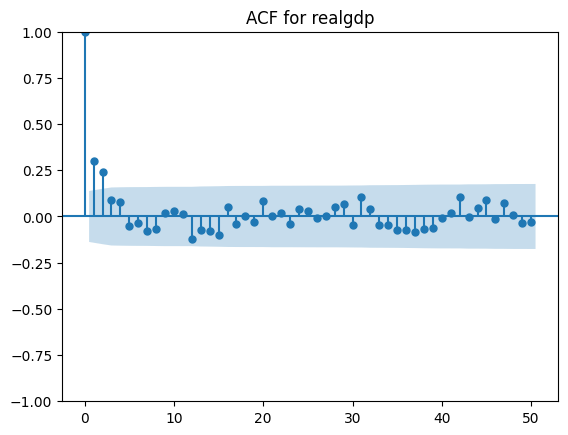

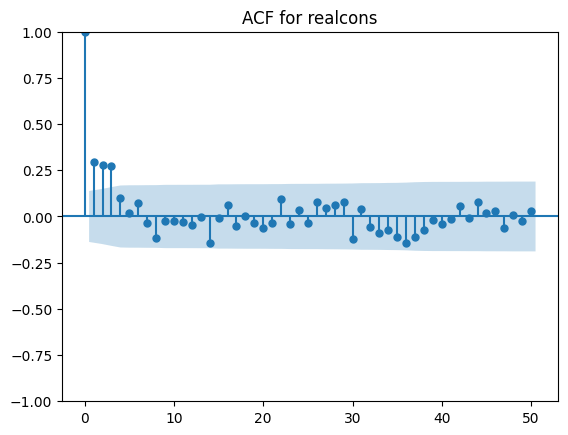

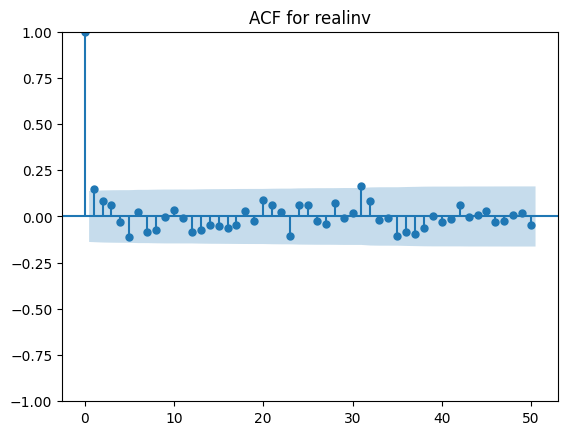

In [176]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
for i in data:
  plot_acf(data[i], lags=50)
  plt.title('ACF for %s' % i)
  plt.show()

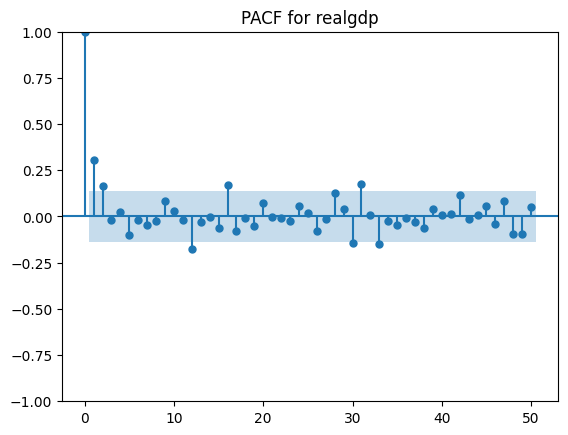

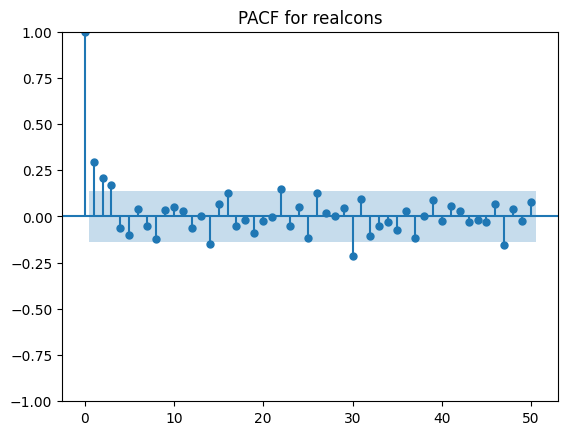

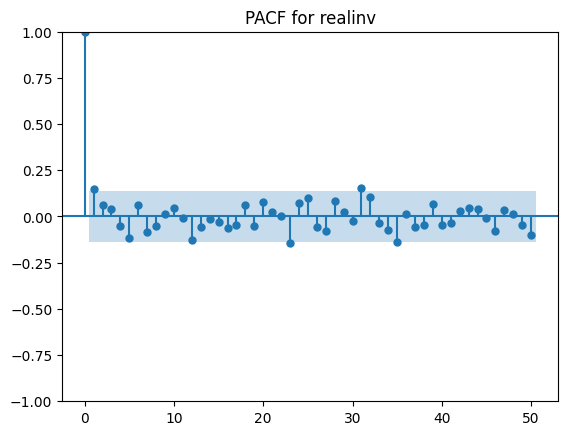

In [177]:
from statsmodels.graphics.tsaplots import plot_pacf
for i in data:
  plot_pacf(data[i], lags=50)
  plt.title('PACF for %s' % i)
  plt.show()

In [178]:
# Stationarity Check
# (H0): non-stationary
# (H1): stationary

from statsmodels.tsa.stattools import adfuller
def adf(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

for i in data:
  print('--Test statistic for %s' % i)
  adf(data[i])

--Test statistic for realgdp
ADF Statistic: -6.972871
p-value: 0.000000
--Test statistic for realcons
ADF Statistic: -4.991971
p-value: 0.000023
--Test statistic for realinv
ADF Statistic: -12.218963
p-value: 0.000000


In [179]:
obs = 5
X_train, X_test = data[0:-obs], data[-obs:]

print(X_train.shape)
print(X_test.shape)

(197, 3)
(5, 3)


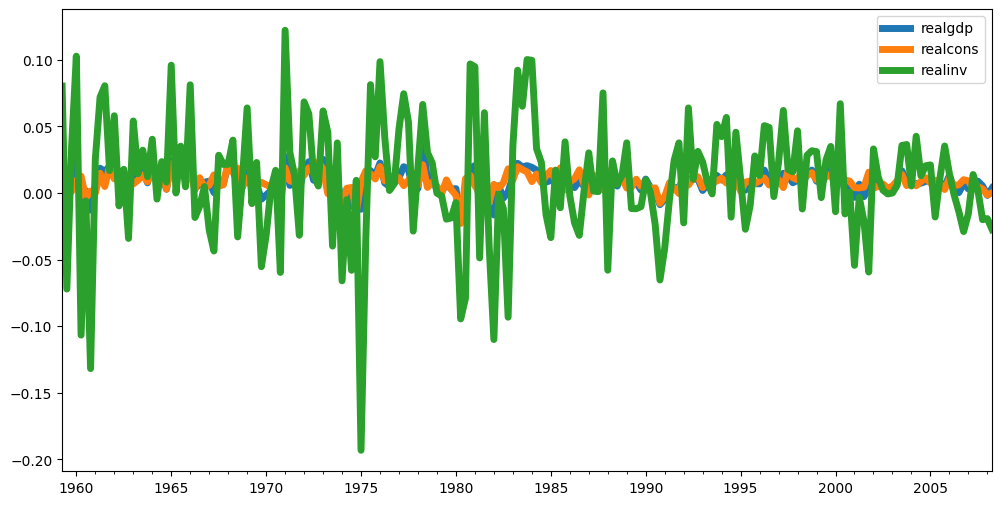

In [180]:
X_train.plot(figsize=(12, 6), linewidth=5)
plt.show()

In [184]:
model_var = VAR(endog=X_train)
res = model_var.select_order(6)
res.summary()

# 1차 이후로는 비슷하다.

,AIC,BIC,FPE,HQIC
0,-27.82,-27.77,8.281e-13,-27.80
1,-28.10*,-27.89*,6.277e-13*,-28.01*
2,-28.07,-27.71,6.449e-13,-27.93
3,-28.07,-27.55,6.476e-13,-27.86
4,-28.07,-27.41,6.439e-13,-27.80
5,-28.05,-27.24,6.554e-13,-27.72
6,-28.01,-27.04,6.826e-13,-27.62


In [182]:
model_fit = model_var.fit(maxlags=3, ic='aic')
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, May, 2023
Time:                     07:49:32
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.8137
Nobs:                     196.000    HQIC:                  -27.9331
Log likelihood:           1923.07    FPE:                6.81589e-13
AIC:                     -28.0144    Det(Omega_mle):     6.41506e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.004187         0.000937            4.470           0.000
L1.realgdp         -0.357764         0.174314           -2.052           0.040
L1.realcons         0.711044         0.133371            5.331    

In [185]:
X_test.shape

(5, 3)

In [186]:
lag_order = model_fit.k_ar
print(lag_order)

1


In [187]:
model_fit.forecast(X_train.values[-lag_order:], steps=5)


array([[ 0.00140148,  0.00531336, -0.02966532],
       [ 0.00573479,  0.00691368, -0.00123542],
       [ 0.00697939,  0.00794494,  0.00403378],
       [ 0.0075745 ,  0.0082942 ,  0.00725638],
       [ 0.00779776,  0.0084469 ,  0.00835919]])

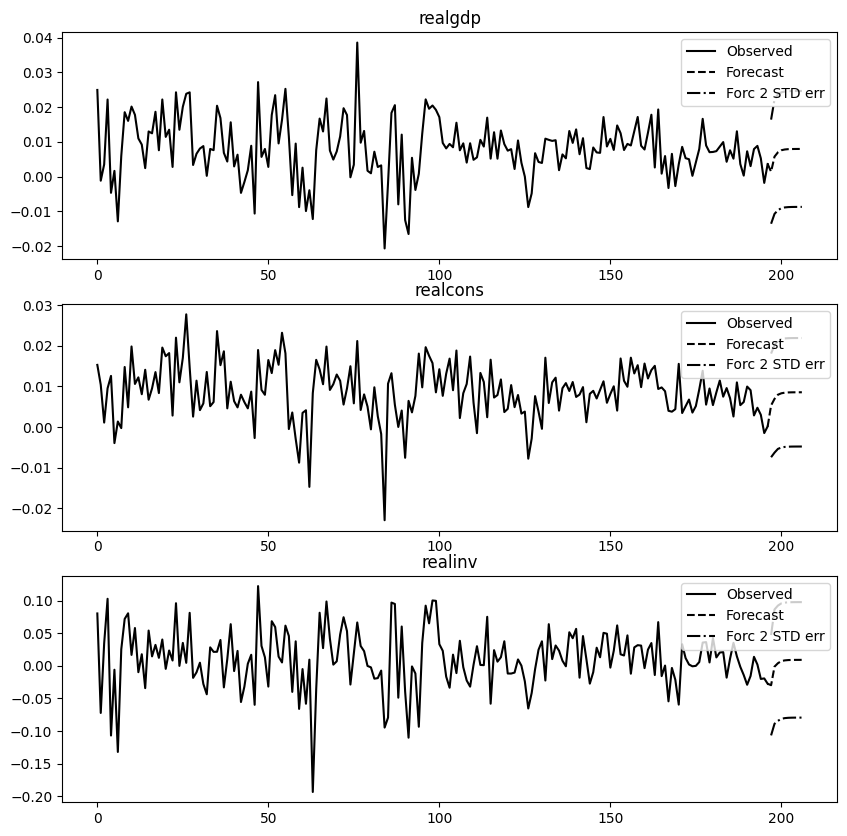

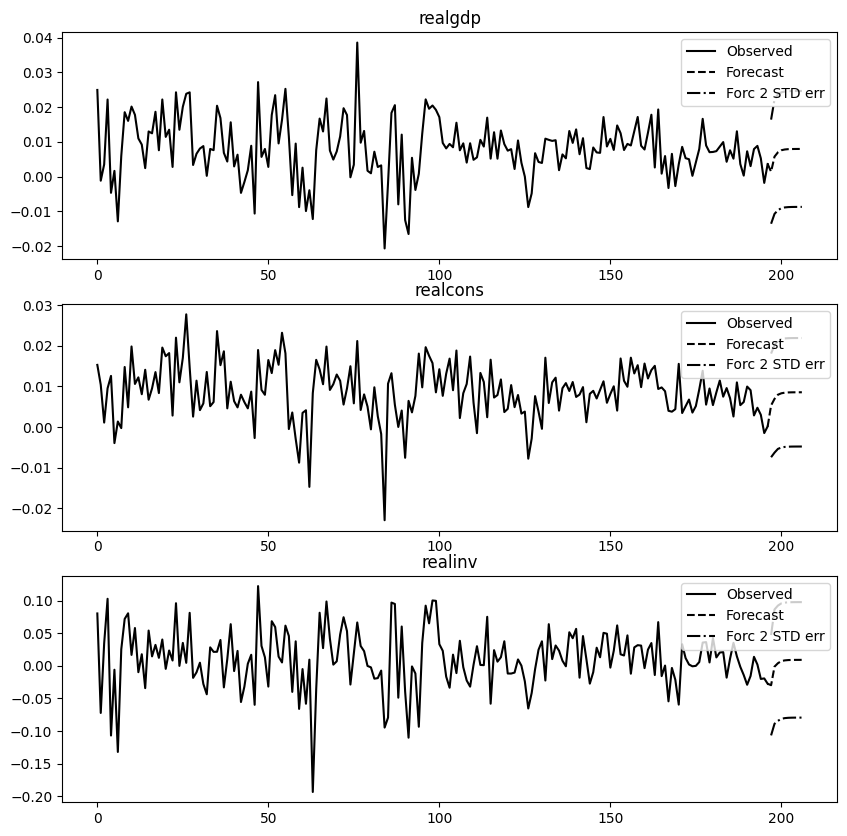

In [188]:
model_fit.plot_forecast(10)

In [189]:
pred = model_fit.forecast(X_train.values[-lag_order:], steps=obs)
pred = pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')
pred

,realgdp_pred,realcons_pred,realinv_pred
2008-09-30,0.001401,0.005313,-0.029665
2008-12-31,0.005735,0.006914,-0.001235
2009-03-31,0.006979,0.007945,0.004034
2009-06-30,0.007575,0.008294,0.007256
2009-09-30,0.007798,0.008447,0.008359


In [190]:
# VAR Forecast evaluation

In [191]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [193]:
#Calculate forecast bias
forecast_errors = [X_test['realgdp'][i]- pred['realgdp_pred'][i] for i in range(len(X_test['realgdp']))]
bias = sum(forecast_errors) * 1.0/len(X_test['realgdp'])
print('Bias: %f' % bias)

#Calculate mean absolute error
mae = mean_absolute_error(X_test['realgdp'],pred['realgdp_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(X_test['realgdp'], pred['realgdp_pred'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

Bias: -0.012335
MAE: 0.012335
MSE: 0.000219
RMSE: 0.014799


### 벡터오차수정모형(Vector Autocorection Model, VECM)

- 공적분 관계의 존재 여부에 따라 VAR와 VECM을 선택
- 공적분(Cointegration): 두 비정상 시계열을 선형조합 했을 때 시계열의 적분 차수가 낮아지거나 정상상태가 되는 경우
   * 적분차수: 정상성이 되기까지 차분해야 하는 횟수
- 두 개 이상의 시계열이 공적분 관계에 있으면 장기관계 또는 균형관계를 가진다는 의미
  - VAR 모형은 각 시계열이 안정성 조건을 만족하지 않아도 사용할 수 있지만, 일반적으로 불안정성 시계열의 경우 차분을 하거나 변수간 장기적 관계에 대하여 정보를 상실할 수 있다는 단점
  - 따라서 변수간 공적분 관계에 있는 시계열은 차분을 거치지 않고 원 데이터를 써서 모형에 적합시킬 수 있다는 점에서 장점을 가진다
  - "Spurious Correlation" (가짜 상관관계)

In [194]:
# VECM Estimation and Analysis

In [195]:
from statsmodels.tsa.vector_ar import vecm

In [196]:
## Statistical Test for Cointegration (VECM 공적분 테스트)
## 귀무가설 : 공적분 특성없다, 대립가설 : 공적분 특성 있다

In [197]:
vec_rank = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          221.1          41.08
  1   3          109.7          23.15
  2   3          39.12          6.635
-------------------------------------


In [198]:
vec_rank2 = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          111.4          29.26
  1   2          70.58          21.75
  2   3          39.12          6.635
-------------------------------------


In [200]:
vecm = vecm.VECM(endog = X_train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

array([[ 0.00082687,  0.00010849, -0.00520949],
       [-0.00249132, -0.00304268, -0.02092717],
       [-0.00242262, -0.00120947, -0.03049337],
       [-0.00187847,  0.00074454, -0.02943497],
       [-0.00018527,  0.00233478, -0.02139283],
       [ 0.00200132,  0.00645151, -0.01665064],
       [ 0.00712903,  0.00793533,  0.01693045],
       [ 0.00686419,  0.00854292,  0.01681462],
       [ 0.01011226,  0.01106216,  0.02519952],
       [ 0.01133034,  0.01202314,  0.03487855]])

In [201]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print('Lower Bounds of Confidence Intervals:')
print(lower.round(3))
print('\nPoint Forecasts:')
print(forecast.round(3))
print('\nUpper Bounds of Confidence Intervals:')
print(upper.round(3))

Lower Bounds of Confidence Intervals:
[[-0.012 -0.011 -0.068]
 [-0.016 -0.014 -0.089]
 [-0.017 -0.013 -0.1  ]
 [-0.016 -0.011 -0.099]
 [-0.015 -0.01  -0.094]
 [-0.013 -0.006 -0.091]
 [-0.008 -0.005 -0.059]
 [-0.009 -0.004 -0.06 ]
 [-0.006 -0.002 -0.054]
 [-0.005 -0.001 -0.046]]

Point Forecasts:
[[ 0.001  0.    -0.005]
 [-0.002 -0.003 -0.021]
 [-0.002 -0.001 -0.03 ]
 [-0.002  0.001 -0.029]
 [-0.     0.002 -0.021]
 [ 0.002  0.006 -0.017]
 [ 0.007  0.008  0.017]
 [ 0.007  0.009  0.017]
 [ 0.01   0.011  0.025]
 [ 0.011  0.012  0.035]]

Upper Bounds of Confidence Intervals:
[[0.014 0.011 0.057]
 [0.011 0.008 0.047]
 [0.012 0.01  0.039]
 [0.013 0.013 0.04 ]
 [0.015 0.015 0.051]
 [0.017 0.019 0.058]
 [0.023 0.021 0.092]
 [0.023 0.021 0.094]
 [0.026 0.024 0.105]
 [0.027 0.025 0.116]]


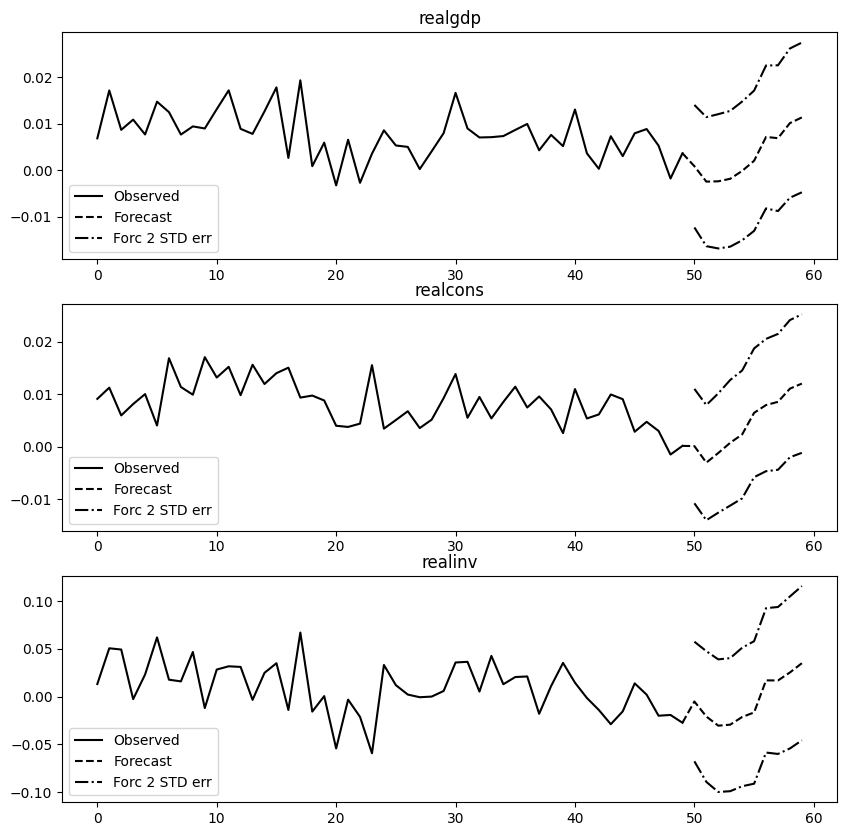

In [202]:
vecm_fit.plot_forecast(steps=10, n_last_obs=50)

In [203]:
# Lag order selection

In [205]:
#results = model.fit(maxlags=15, ic='aic')